## Import Libraries

In [1]:
from image_preprocessing import datagens, prepareImages, prepareLabels
from train_valid_split import train_valid_split, train_valid_dict_generator

Using TensorFlow backend.


In [2]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

In [3]:
import tensorflow as tf
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
import pandas as pd
import numpy as np
import cv2

In [51]:
import model4

In [52]:
from model4 import model_deep

In [7]:
from tensorflow.keras.optimizers import Adam

from keras.callbacks import ReduceLROnPlateau

## Load Images & Labels 

In [8]:
# load training data with image names and Ids
train_labels = pd.read_csv("df_train.csv")

In [9]:
train, valid = train_valid_split(train_labels)

In [10]:
train_df, valid_df = train_valid_dict_generator(train,valid,train_labels)

In [11]:
train_df_final = pd.DataFrame(train_df.items(), columns=['Image', 'Id'])
valid_df_final = pd.DataFrame(valid_df.items(), columns=['Image', 'Id'])

In [16]:
all_train_classes = list(train_df_final['Id'].unique())

In [17]:
all_valid_classes = list(valid_df_final['Id'].unique())

In [19]:
# keep only the common classes within both datasets
common_classes = []
for i in all_valid_classes:
    if i in all_train_classes:
        common_classes.append(i)

In [46]:
train_df_final = train_df_final[train_df_final['Id'].isin(common_classes)]

In [47]:
# prepare the training images by applying preprocessing and normalization
X_train = prepareImages(train_df_final,train_df_final.shape[0], "...\\Documents\\whale_identification\\whale_identification\\data\\train_rev1\\")

Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  07c035b2b.jpg
Processing image:  1001 ,  w_4e1e04dfg3819.jpg
Processing image:  1501 ,  2cec8d6eb.jpg
Processing image:  2001 ,  w_89f521efg18213.jpg
Processing image:  2501 ,  w_c875e45fg10023.jpg
Processing image:  3001 ,  9bb2205c1.jpg
Processing image:  3501 ,  028e0f415.jpg
Processing image:  4001 ,  e4d1c6750.jpg
Processing image:  4501 ,  145d97da0.jpg
Processing image:  5001 ,  660ce1b74.jpg
Processing image:  5501 ,  w_40a6c9cfg2641.jpg
Processing image:  6001 ,  w_9748a78fg28712.jpg
Processing image:  6501 ,  w_a059841fg107911.jpg
Processing image:  7001 ,  w_aa32f70fg3442.jpg
Processing image:  7501 ,  06b0680ea.jpg
Processing image:  8001 ,  fee4c2709.jpg
Processing image:  8501 ,  w_171dc55fg141712.jpg
Processing image:  9001 ,  081ee4083.jpg
Processing image:  9501 ,  w_34ecf36fg201432.jpg
Processing image:  10001 ,  cf3308136.jpg
Processing image:  10501 ,  0a1aa01e8.jpg
Processing image:  11001 ,  w_dfb57cc

In [48]:
X_train.shape

(35146, 40, 40, 3)

In [49]:
# prepare classes by one hot encoding whale categories
y_train = prepareLabels(train_df_final,len(train_df_final['Id'].unique()))

In [50]:
y_train.shape

(35146, 2572)

- We have more classes represented in validation set than in the training set, because of the way we split the data originally.
- For consistency and for the purposes of this notebook, let's keep just the common classes for now.

In [18]:
len(all_train_classes)

2641

In [20]:
len(common_classes)

2572

In [21]:
valid_df_final = valid_df_final[valid_df_final['Id'].isin(common_classes)]

In [24]:
# prepare validation features by applying preprocessing and normalization
X_valid = prepareImages(valid_df_final,valid_df_final.shape[0], "...\\Documents\\whale_identification\\whale_identification\\data\\train\\")

Processing image:  1 ,  w_f48451cfg02.jpg
Processing image:  501 ,  w_89f521efg18222.jpg
Processing image:  1001 ,  w_3f7d5f5fg17125.jpg
Processing image:  1501 ,  w_37d2f3afg121529.jpg
Processing image:  2001 ,  w_5773c71fg132036.jpg
Processing image:  2501 ,  w_15e7de5fg50714.jpg
Processing image:  3001 ,  w_b86917dfg378020.jpg
Processing image:  3501 ,  w_3cb4838fg369022.jpg
Processing image:  4001 ,  w_acba807fg296623.jpg
Processing image:  4501 ,  w_c1d2d7ffg113422.jpg
Processing image:  5001 ,  w_2af46a8fg133025.jpg
Processing image:  5501 ,  w_2112103fg154228.jpg
Processing image:  6001 ,  w_d3b1733fg177726.jpg
Processing image:  6501 ,  w_ba77e9cfg209414.jpg
Processing image:  7001 ,  w_c190aa8fg242316.jpg
Processing image:  7501 ,  w_67f670efg277214.jpg
Processing image:  8001 ,  w_c7e1b12fg319914.jpg
Processing image:  8501 ,  w_f182e2afg371415.jpg
Processing image:  9001 ,  w_e31480ffg422316.jpg


In [25]:
X_valid.shape

(9015, 40, 40, 3)

In [26]:
# prepare validation labels by one hot encoding the whale categories
y_valid = prepareLabels(valid_df_final,len(valid_df_final['Id'].unique()))

## Train a CNN

In [53]:
model = model_deep()

In [54]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics =['accuracy'])

In [55]:
# apply data augmentations
train_datagen, valid_datagen = datagens()

In [56]:
epochs = 20
batch_size = 1000

In [57]:
validation_set = valid_datagen.flow(X_valid, y_valid, batch_size = batch_size)

In [58]:
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                              epochs= epochs, verbose = 2, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = validation_set,
                              validation_steps = X_valid.shape[0] // batch_size
                            )

Epoch 1/20
 - 201s - loss: 7.7753 - accuracy: 0.0019 - val_loss: 7.7284 - val_accuracy: 0.0019
Epoch 2/20
 - 187s - loss: 7.3668 - accuracy: 0.0075 - val_loss: 7.4185 - val_accuracy: 0.0017
Epoch 3/20
 - 201s - loss: 6.9359 - accuracy: 0.0164 - val_loss: 7.1414 - val_accuracy: 0.0070
Epoch 4/20
 - 194s - loss: 6.5520 - accuracy: 0.0291 - val_loss: 6.8367 - val_accuracy: 0.0145
Epoch 5/20
 - 193s - loss: 6.2370 - accuracy: 0.0480 - val_loss: 6.5074 - val_accuracy: 0.0279
Epoch 6/20
 - 198s - loss: 5.8869 - accuracy: 0.0696 - val_loss: 5.9941 - val_accuracy: 0.0621
Epoch 7/20
 - 196s - loss: 5.5757 - accuracy: 0.0965 - val_loss: 5.5127 - val_accuracy: 0.1041
Epoch 8/20
 - 199s - loss: 5.2159 - accuracy: 0.1334 - val_loss: 5.0974 - val_accuracy: 0.1446
Epoch 9/20
 - 198s - loss: 4.9027 - accuracy: 0.1710 - val_loss: 4.7633 - val_accuracy: 0.1928
Epoch 10/20
 - 204s - loss: 4.6166 - accuracy: 0.2075 - val_loss: 4.0623 - val_accuracy: 0.2472
Epoch 11/20
 - 204s - loss: 4.3314 - accuracy: 0.

In [59]:
model.save('my_model')
model.save_weights('my_weights.h5')

In [61]:
import matplotlib.pyplot as plt

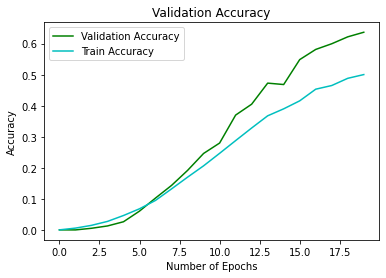

In [64]:
# plot the accuracy curve 
plt.plot(history.history['val_accuracy'], color='g', label="Validation Accuracy")
plt.plot(history.history['accuracy'], color='c', label="Train Accuracy")
plt.title("Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()